# **Installation of Bangla-nltk and Bangla lemmatizer**
*   BanglaNLTK is a Python library designed for natural language processing (NLP) tasks specifically for the Bengali language.
*   Lemmatizer library is used to reduce words to their base or root form.



In [ ]:
! pip install banglanltk
! pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-r204cfb9/banglakit-lemmatizer_fc3b977ca491498282f4c0593e2eb1b8
  Running command git clone --filter=blob:none --quiet https://github.com/banglakit/lemmatizer.git /tmp/pip-install-r204cfb9/banglakit-lemmatizer_fc3b977ca491498282f4c0593e2eb1b8
  Resolved https://github.com/banglakit/lemmatizer.git to commit f94d8f8dfe06fac70fa151a46069888acffe8870
  Preparing metadata (setup.py) ... done


# **Importing necessary libraries**
*  **Pandas:** Manipulate and analyze data tables.
*  **NumPy:** Work with large arrays and perform mathematical operations.
*  **re (regular expressions):** Search and manipulate strings based on patterns.
*  **Matplotlib:** Create visualizations such as plots and charts.



In [ ]:
import banglanltk as bn
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# **Mount from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the cyberbullying dataset**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/cyberbulling.xlsx')
df.head(6)

,comment,Category,Gender,comment react number,label
0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,Politician,Male,1.0,religious
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,Politician,Male,1.0,not bully
4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,Politician,Male,3.0,troll
5,অন্যরকম .. ভালো লাগলো ..❤️,Singer,Male,1.0,not bully


# **1. Data Analysis Part**

---



# **Print the shape of the dataset**

In [ ]:
df.shape

(44001, 5)

# **Calculate the percentage of Male and Female members and plot them**

Percentage of gender 'Female': 68.06%
Percentage of gender 'Male': 31.94%



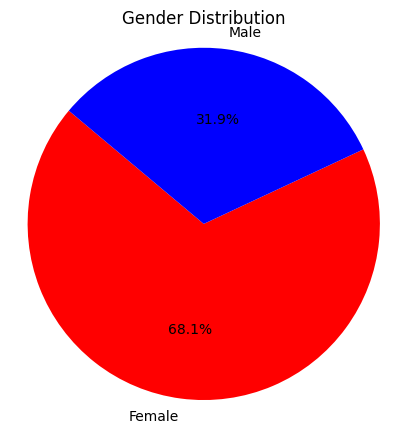

In [ ]:
# Calculate the total number of entries
total_entries = len(df)

# Count the number of males and females
gender_counts = df['Gender'].value_counts()

# Calculate the percentage of each class
gender_percentages = (gender_counts / total_entries) * 100

# Print the results
for gender, percentage in gender_percentages.items():
    print(f"Percentage of gender '{gender}': {percentage:.2f}%")

print()
# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#ff0000','#0000ff'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# ***-- From the pie chart we see that Female members comment more than Male members***

# **Calculate the percentage of each classes and plot them**

Number of classes: 5
Percentage of class 'not bully': 34.86%
Percentage of class 'troll': 23.78%
Percentage of class 'sexual': 20.29%
Percentage of class 'religious': 17.22%
Percentage of class 'threat': 3.85%



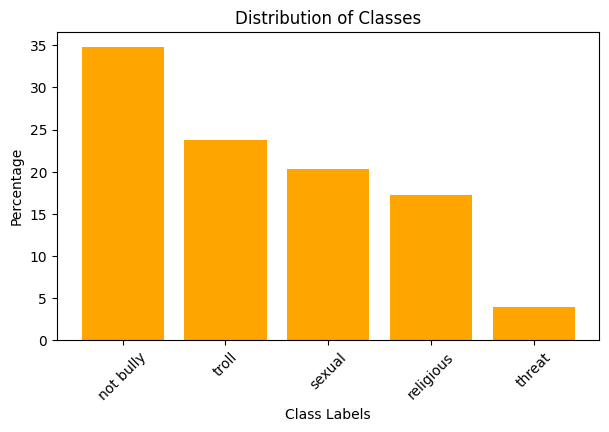

In [ ]:
# Get the number of distinct classes in the 'label' column
distinct_classes = df['label'].nunique()

# Print the result
print(f"Number of classes: {distinct_classes}")

# Get the count of each distinct class in the 'label' column
class_counts = df['label'].value_counts()

# Calculate the percentage of each class
class_percentages = (class_counts / total_entries) * 100

# Print the results
for label, percentage in class_percentages.items():
    print(f"Percentage of class '{label}': {percentage:.2f}%")

print()

# Plot the histogram
plt.figure(figsize=(7,4))
plt.bar(class_percentages.index, class_percentages, color='orange')
plt.xlabel('Class Labels')
plt.ylabel('Percentage')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.show()

# **Printing the top six rows of the dataset**

In [ ]:
df.head(6)

,comment,Category,Gender,comment react number,label
0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,Politician,Male,1.0,religious
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,Politician,Male,1.0,not bully
4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,Politician,Male,3.0,troll
5,অন্যরকম .. ভালো লাগলো ..❤️,Singer,Male,1.0,not bully


# **2. Data Preprocessing Part**

---



# **Load the stopword dataset**
* Using a set is efficient for membership testing because sets provide average O(1) time complexity for lookups.

In [ ]:
stopwords_df = pd.read_excel('/content/drive/MyDrive/Stopward.xlsx')

# Convert stopwords to a set
bangla_stop_words = set(stopwords_df.iloc[:, 0].tolist())

# **Function for removing non-Bengali letters, URLs, all types of digits, numbers, punctuations, emojis, and Bengali stopwords**


*   Normalization of data.



In [ ]:
# Function to remove unwanted elements
def clean_comment(text):

    # Remove all non-Bengali characters
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove English digits (0-9) and Bengali digits (০-৯)
    text = re.sub(r'\d+', '', text)

    # Use bnltk to remove punctuations and further clean
    text = bn.clean_text(text)

    # Remove all emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        u"\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and pictographs extended-A
        u"\U0001F018-\U0001F270"  # Various Asian characters
        u"\U0001F300-\U0001F5FF"  # Miscellaneous symbols and pictographs
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove Bengali stopwords
    text = ' '.join(word for word in text.split() if word not in bangla_stop_words)

    return text

# Apply the cleaning function to the 'comment' column
df['comment'] = df['comment'].apply(clean_comment)

# Print the top 5 rows of the cleaned dataset
df.head(6)

,comment,Category,Gender,comment react number,label
0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো ক্ষমতায় ততো হত...,Politician,Male,1.0,religious
1,ঘরে শুট কেমন লেগেছে ক্যামেরাতে,Singer,Male,2.0,not bully
2,অরে বাবা টা পাগল,Actor,Female,2.0,not bully
3,মামলা নেতা কর্মীরা বছর মাথা উঁচু দাড়িয়ে দলটির ...,Politician,Male,1.0,not bully
4,যানবাহন বন্ধ পরও এরকম সমাবেশের লোক খারাপ ভালো ...,Politician,Male,3.0,troll
5,অন্যরকম ভালো লাগলো,Singer,Male,1.0,not bully


# **Apply tokenization to the dataset**

*   Separate each words from sentences for feature selection process.




In [ ]:
 # Function to tokenize using bn.word_tokenize()
def tokenize_comment(text):
    tokens = bn.word_tokenize(text)
    return tokens

# Apply tokenization to the cleaned 'comment' column
df['comment'] = df['comment'].apply(tokenize_comment)

# Print the top 6 rows of the cleaned dataset
df.head(6)

,comment,Category,Gender,comment react number,label
0,"[আওয়ামী, লীগ, স্বৈরাচারী, সরকার, যতো, ক্ষমতায়,...",Politician,Male,1.0,religious
1,"[ঘরে, শুট, কেমন, লেগেছে, ক্যামেরাতে]",Singer,Male,2.0,not bully
2,"[অরে, বাবা, টা, পাগল]",Actor,Female,2.0,not bully
3,"[মামলা, নেতা, কর্মীরা, বছর, মাথা, উঁচু, দাড়িয়ে...",Politician,Male,1.0,not bully
4,"[যানবাহন, বন্ধ, পরও, এরকম, সমাবেশের, লোক, খারা...",Politician,Male,3.0,troll
5,"[অন্যরকম, ভালো, লাগলো]",Singer,Male,1.0,not bully


# **Apply lemmatization to the dataset**
*   Library for Bangla lemmatizer.
*   Lemmatizer reduce words to their base or root form.
*   Normalize the dataset.




In [ ]:
from banglakit.lemmatizer import BengaliLemmatizer

In [ ]:
# Initialize the Bengali lemmatizer
lemmatizer = BengaliLemmatizer()

# Function to lemmatize tokens using BengaliLemmatizer
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to the tokenized comments
df['comment'] = df['comment'].apply(lemmatize_tokens)

# Print the top 6 rows of the cleaned dataset
df.head(6)

,comment,Category,Gender,comment react number,label
0,"[আওয়ামী, লীগ, স্বৈরাচারী, সরকার, যতো, ক্ষমতায়,...",Politician,Male,1.0,religious
1,"[ঘরে, শুট, কেমন, লাগ, ক্যামেরাতে]",Singer,Male,2.0,not bully
2,"[অরে, বাবা, টা, পাগল]",Actor,Female,2.0,not bully
3,"[মামলা, নেতা, কর্মীরা, বছর, মাথা, উঁচু, দাড়িয়ে...",Politician,Male,1.0,not bully
4,"[যানবাহন, বন্ধ, পরও, এরকম, সমাবেশের, লোক, খারা...",Politician,Male,3.0,troll
5,"[অন্যরকম, ভালো, লাগলো]",Singer,Male,1.0,not bully


# **3. Feature Selection Part**

---



# **Convert the dataset from multiclass to binary class**

**Reason:**  It simplifies the problem to distinguishing between two classes, making it compatible with certain algorithms and potentially improving performance, especially in handling class imbalances and meeting specific task requirements.
* Threat, religious, sexual, and troll texts are represented as 1 (bully).
* Neutral as 0 (non-bully).




In [ ]:
# Assuming 'category' is the column with the class labels
bully_classes = ['threat', 'sexual', 'religious', 'troll']

# Create a binary class column based on the bully_classes
df['binary_class'] = df['label'].apply(lambda x: 1 if x in bully_classes else 0)

df.head(6)

,comment,Category,Gender,comment react number,label,binary_class
0,"[আওয়ামী, লীগ, স্বৈরাচারী, সরকার, যতো, ক্ষমতায়,...",Politician,Male,1.0,religious,1
1,"[ঘরে, শুট, কেমন, লাগ, ক্যামেরাতে]",Singer,Male,2.0,not bully,0
2,"[অরে, বাবা, টা, পাগল]",Actor,Female,2.0,not bully,0
3,"[মামলা, নেতা, কর্মীরা, বছর, মাথা, উঁচু, দাড়িয়ে...",Politician,Male,1.0,not bully,0
4,"[যানবাহন, বন্ধ, পরও, এরকম, সমাবেশের, লোক, খারা...",Politician,Male,3.0,troll,1
5,"[অন্যরকম, ভালো, লাগলো]",Singer,Male,1.0,not bully,0


# **Calculate the number of Bullying and Non-Bullying texts and plot them for proper visualization**

Number of bullying texts: 28661
Number of non-bullying texts: 15340



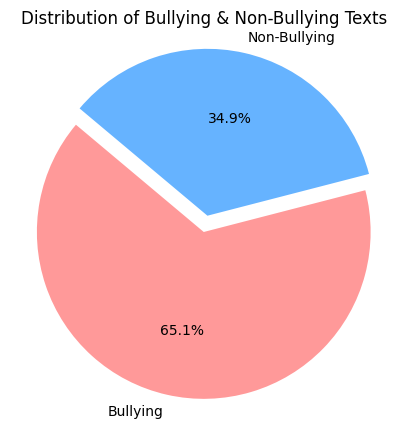

In [ ]:
# Count the number of bullying and non-bullying texts
bully_count = df['binary_class'].sum()
non_bully_count = len(df) - bully_count

print(f"Number of bullying texts: {bully_count}")
print(f"Number of non-bullying texts: {non_bully_count}")
print()

# Prepare data for the pie chart
labels = ['Bullying', 'Non-Bullying']
sizes = [bully_count, non_bully_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice (Bullying)

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bullying & Non-Bullying Texts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Apply TF-IDF vectorizer for feature selection**
*   Library for **TF-IDF** vectorizer.
*   Stands for Term Frequency-Inverse Document Frequency.
*   Measures how important a word is to a sentence in a collection of dataset.
*   Taking total **7000** features from the tokenized comment.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Convert lemmatized tokens back to a single string per comment
df['comment_text'] = df['comment'].apply(lambda tokens: ' '.join(tokens))

# Flatten the list of tokens and count the frequency of each word
word_counter = Counter(word for tokens in df['comment'] for word in tokens)

# Select the top most common words
top_words = [word for word, _ in word_counter.most_common(7000)]

# **TF-IDF**

In [ ]:
# Create a DataFrame with these top  words as columns and fill with zeros
tfidf_df = pd.DataFrame(0, index=df.index, columns=top_words)

# Initialize the TF-IDF Vectorizer with the top 500 words as the vocabulary
tfidf_vectorizer = TfidfVectorizer(vocabulary=top_words)

# Transform the text data into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['comment_text'])

# Convert the TF-IDF matrix to a DataFrame for easier manipulation
tfidf_matrix_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df.index)

# Update the tfidf_df with the TF-IDF values
tfidf_df.update(tfidf_matrix_df)

tfidf_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


,-PRON-,নাস্তিক,বিশ্বাস,আল্লাহ,কথা,একটা,দেখ,কর,হিরো,সাফা,...,চ্যাট,বালটা,ভূয়া,এনার্জি,মুসলাম,আলি,ইভিএম,কেন্দ্রে,দেখাইলে,দেখতেছে
0,0,0,0,0,0,0,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0.312255,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43996,0,0,0,0,0,0,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
43997,0,0,0,0,0,0,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
43998,0,0,0,0,0,0,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
43999,0,0,0,0,0,0,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


# **K-NN for TF-IDF vectorizer**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.5947
Precision: 0.7587
Recall: 0.5539
F1-score: 0.6403


# **Logistic Regression for TF-IDF vectorizer**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Logistic Regression Model Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.72
Precision: 0.72
Recall: 0.92
F1-Score: 0.81


# **Random Forest for TF-IDF vectorizer**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Random Forest Model Results:
Accuracy: 0.72
Precision: 0.73
Recall: 0.90
F1-Score: 0.81


# **Apply Bag of Word (BOW) and Count vectorizer for feature selection**

*   Library for **Count vectorizer**.
*   Representation of text that counts the frequency of words, disregarding grammar and word order, to create a simple model of the text.
*   Taking total **7000** features from the tokenized comment.

# **Uni-Gram**

In [ ]:
# Create a DataFrame with these top words as columns and fill with zeros
uni_df = pd.DataFrame(0, index=df.index, columns=top_words)

# Initialize the CountVectorizer with the top words as the vocabulary
count_vectorizer = CountVectorizer(vocabulary=top_words)

# Transform the text data into a uni matrix
uni_matrix = count_vectorizer.fit_transform(df['comment_text'])

# Convert the uni matrix to a DataFrame for easier manipulation
uni_matrix_df = pd.DataFrame(uni_matrix.toarray(), columns=count_vectorizer.get_feature_names_out(), index=df.index)

# Update the uni_df with the uni values
uni_df.update(uni_matrix_df)

uni_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


,-PRON-,নাস্তিক,বিশ্বাস,আল্লাহ,কথা,একটা,দেখ,কর,হিরো,সাফা,...,চ্যাট,বালটা,ভূয়া,এনার্জি,মুসলাম,আলি,ইভিএম,কেন্দ্রে,দেখাইলে,দেখতেছে
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **K-NN for UNI-gram**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(uni_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.5852
Precision: 0.7377
Recall: 0.5633
F1-score: 0.6388


# **Logistic Regression for UNI-gram**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(uni_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.71
Precision: 0.71
Recall: 0.94
F1-Score: 0.81


# **Random Forest for UNI-gram**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(uni_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Random Forest Model Results:
Accuracy: 0.71
Precision: 0.73
Recall: 0.89
F1-Score: 0.80


# **BI-Gram**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a DataFrame with these top bi-grams as columns and fill with zeros
bi_df = pd.DataFrame(0, index=df.index, columns=top_words)  # Assuming top_words contains the top bi-grams

# Initialize the CountVectorizer with the top bi-grams as the vocabulary
count_vectorizer = CountVectorizer(vocabulary=top_words, ngram_range=(2, 2))

# Transform the text data into a bi-gram matrix
bi_matrix = count_vectorizer.fit_transform(df['comment_text'])

# Convert the bi-gram matrix to a DataFrame for easier manipulation
bi_matrix_df = pd.DataFrame(bi_matrix.toarray(), columns=count_vectorizer.get_feature_names_out(), index=df.index)

# Update the bi_df with the bi-gram values
bi_df.update(bi_matrix_df)

bi_df


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


,-PRON-,নাস্তিক,বিশ্বাস,আল্লাহ,কথা,একটা,দেখ,কর,হিরো,সাফা,...,চ্যাট,বালটা,ভূয়া,এনার্জি,মুসলাম,আলি,ইভিএম,কেন্দ্রে,দেখাইলে,দেখতেছে
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **K-NN for BI-gram**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bi_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6513
Precision: 0.6513
Recall: 1.0000
F1-score: 0.7888


# **Logistic Regression for BI-gram**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bi_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.65
Precision: 0.65
Recall: 1.00
F1-Score: 0.79


# **Random Forest for BI-gram**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(bi_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Random Forest Model Results:
Accuracy: 0.65
Precision: 0.65
Recall: 1.00
F1-Score: 0.79


# **TRI-gram**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df is already defined and top_words contains the top tri-grams

# Create a DataFrame with these top tri-grams as columns and fill with zeros
tri_df = pd.DataFrame(0, index=df.index, columns=top_words)  # Assuming top_words contains the top tri-grams

# Initialize the CountVectorizer with the top tri-grams as the vocabulary
count_vectorizer = CountVectorizer(vocabulary=top_words, ngram_range=(3, 3))

# Transform the text data into a tri-gram matrix
tri_matrix = count_vectorizer.fit_transform(df['comment_text'])

# Convert the tri-gram matrix to a DataFrame for easier manipulation
tri_matrix_df = pd.DataFrame(tri_matrix.toarray(), columns=count_vectorizer.get_feature_names_out(), index=df.index)

# Update the tri_df with the tri-gram values
tri_df.update(tri_matrix_df)

tri_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


,-PRON-,নাস্তিক,বিশ্বাস,আল্লাহ,কথা,একটা,দেখ,কর,হিরো,সাফা,...,চ্যাট,বালটা,ভূয়া,এনার্জি,মুসলাম,আলি,ইভিএম,কেন্দ্রে,দেখাইলে,দেখতেছে
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **K-NN for TRI-gram**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tri_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6513
Precision: 0.6513
Recall: 1.0000
F1-score: 0.7888


# **Logistic Regression for TRI-gram**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tri_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.65
Precision: 0.65
Recall: 1.00
F1-Score: 0.79


# **Random Forest for TRI-gram**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(tri_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Random Forest Model Results:
Accuracy: 0.65
Precision: 0.65
Recall: 1.00
F1-Score: 0.79


In [ ]:
!pip install gensim

# **Word2Vec**

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Train Word2Vec model
sentences = df['comment'].tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to transform comments into feature vectors
def comment_to_vector(comment):
    vectors = [word2vec_model.wv[word] for word in comment if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

# Apply the function to the comments
df['comment_vector'] = df['comment'].apply(comment_to_vector)

# Create a DataFrame from the comment vectors
vector_columns = [f'vec_{i}' for i in range(100)]
vector_df = pd.DataFrame(df['comment_vector'].tolist(), index=df.index, columns=vector_columns)

vector_df

,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,...,vec_90,vec_91,vec_92,vec_93,vec_94,vec_95,vec_96,vec_97,vec_98,vec_99
0,-0.211121,0.354896,0.058319,0.112114,0.029276,-0.432243,0.061836,0.505589,-0.228087,-0.171920,...,0.373793,0.131740,0.060148,0.088497,0.540480,0.408143,0.193889,-0.291413,0.070679,-0.005916
1,-0.452698,0.547825,0.474544,-0.286956,-0.323901,-1.244066,0.140327,1.099303,-0.554357,-0.449423,...,0.925641,0.031940,-0.240746,-0.118565,0.442511,0.420919,0.759943,-0.675993,-0.026668,0.102498
2,-0.099824,0.280309,1.006051,-0.426457,-0.309597,-2.189934,-0.088928,1.889922,-0.468197,-0.669602,...,1.404274,0.579987,-0.229342,-0.018641,1.042440,0.643584,0.936831,-0.905695,0.024524,-0.118123
3,-0.236752,0.479630,0.270454,0.009881,-0.013987,-0.947067,0.120725,0.875044,-0.319666,-0.491374,...,0.490731,0.217416,0.079050,0.166300,0.825961,0.781180,0.458651,-0.581760,0.147479,0.137249
4,-0.466737,0.890288,0.410789,-0.304286,-0.064775,-1.248079,0.170131,1.048996,-0.678343,-0.559933,...,0.782672,0.269805,-0.003459,0.084947,0.730467,0.780755,0.443306,-0.719666,-0.231770,0.428084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43996,-1.400930,1.204673,0.976298,-0.376067,0.452800,-1.736802,0.762196,2.784286,-0.757320,-0.639035,...,1.823844,-0.374269,0.849481,-0.719792,2.073121,1.607639,1.862790,-0.928343,0.951147,0.345063
43997,-1.211800,1.155850,0.683430,-0.226866,0.339689,-1.124933,0.516356,1.842777,-0.905026,-0.347200,...,1.652697,-0.122496,0.491633,-0.332071,1.551723,1.052143,0.910563,-0.473326,0.355855,0.021055
43998,-1.225274,0.916023,0.729552,-0.088382,0.294078,-1.285004,0.747662,1.961865,-0.717967,-0.294338,...,1.426181,-0.347525,0.498160,-0.575854,1.510007,1.137416,1.389764,-0.798246,0.855390,0.033003
43999,-0.407242,0.753349,0.622093,-0.017546,0.036379,-1.273515,0.139199,1.412415,-0.526904,-0.477960,...,0.976797,0.320206,0.181799,-0.014165,1.071348,0.812425,0.588648,-0.598529,-0.096150,0.039382


# **K-NN for Word2Vec**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vector_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8138
Precision: 0.8408
Recall: 0.8808
F1-score: 0.8604


# **Logistic Regression for Word2Vec**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vector_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.81
Precision: 0.82
Recall: 0.92
F1-Score: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Random Forest for Word2Vec**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(vector_df, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Random Forest Model Results:
Accuracy: 0.84
Precision: 0.85
Recall: 0.90
F1-Score: 0.88


# **GloVe**

In [ ]:
from gensim.models import KeyedVectors
from tqdm import tqdm

In [ ]:
# Path to GloVe embeddings file in Google Drive
glove_file = '/content/drive/MyDrive/bn_glove.39M.300d.txt'

# Load GloVe embeddings
embed_dict = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], 'float32')
        embed_dict[word] = vector

# Function to transform comments into GloVe vectors
def comment_to_vector_glove(comment):
    vectors = [embed_dict[word] for word in comment if word in embed_dict]
    if len(vectors) == 0:
        return np.zeros(300)  # Adjust the size based on your GloVe vector size
    return np.mean(vectors, axis=0)

# Assuming 'df' is your DataFrame containing 'comment' column

# Apply the function to the comments
df['comment_vector_glove'] = df['comment'].apply(comment_to_vector_glove)

# Create a DataFrame from the GloVe vectors
vector_columns_glove = [f'vec_glove_{i}' for i in range(300)]  # Adjust the size based on your GloVe vector size
vector_df_glove = pd.DataFrame(df['comment_vector_glove'].tolist(), index=df.index, columns=vector_columns_glove)

vector_df_glove

178153it [00:18, 9687.20it/s] 


,vec_glove_0,vec_glove_1,vec_glove_2,vec_glove_3,vec_glove_4,vec_glove_5,vec_glove_6,vec_glove_7,vec_glove_8,vec_glove_9,...,vec_glove_290,vec_glove_291,vec_glove_292,vec_glove_293,vec_glove_294,vec_glove_295,vec_glove_296,vec_glove_297,vec_glove_298,vec_glove_299
0,-0.106262,-0.014231,-0.331613,0.028649,0.086886,-0.034073,0.120672,-0.048690,0.035496,-0.124452,...,0.282438,0.195295,-0.277463,-0.282716,0.194001,0.038156,0.356038,-0.198863,-0.131475,-0.246472
1,-0.209484,0.186093,0.146237,0.160921,0.070060,-0.070534,-0.051928,0.105910,0.020216,0.061640,...,-0.018947,0.043668,0.125100,0.047815,-0.036392,-0.087357,0.191799,-0.116025,-0.079108,0.066371
2,-0.043003,0.088930,-0.129636,-0.189836,0.033991,-0.060945,-0.227605,-0.040048,-0.237395,0.278440,...,-0.210876,-0.008017,-0.111161,0.176000,-0.126149,-0.054167,0.214844,0.261009,-0.240929,0.069526
3,0.093051,-0.017894,-0.108690,-0.143542,0.199257,0.044718,-0.216910,0.232994,-0.082665,-0.223939,...,0.556315,0.167552,-0.068112,-0.218146,0.069509,-0.049582,0.457835,-0.161085,-0.268951,-0.054462
4,0.100159,0.143990,-0.054620,-0.163618,0.000134,0.074344,-0.097046,0.171743,-0.409574,-0.033517,...,0.359818,0.000470,-0.174065,0.234234,-0.045807,-0.200874,0.530242,-0.107978,0.080938,0.019520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43996,-0.066887,-0.273262,-0.177648,-0.258603,0.133708,0.180800,-0.256513,0.326702,0.015210,-0.280086,...,0.046667,-0.098525,-0.197531,-0.186534,0.202751,0.036301,0.576953,0.354092,-0.175097,-0.134995
43997,-0.025937,-0.166037,0.038446,-0.065138,0.066060,0.135938,-0.329465,0.160307,-0.090605,-0.005624,...,-0.065766,0.056821,-0.158907,0.050492,0.204313,-0.058042,0.265627,0.108890,-0.012934,-0.006482
43998,-0.124968,-0.125805,-0.312150,-0.308170,0.034108,0.193830,-0.299800,0.415672,-0.043351,-0.196207,...,0.228419,-0.004723,-0.465446,-0.309574,0.145080,-0.087103,0.524523,0.185096,-0.165971,-0.140828
43999,-0.083038,-0.217829,-0.035933,-0.212035,0.075186,0.000113,0.060573,0.254231,-0.185373,0.116676,...,0.049111,-0.149013,0.004176,-0.011735,-0.016869,-0.104760,0.636735,0.274183,-0.285780,-0.040668


# **K-NN for GloVe**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vector_df_glove, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7979
Precision: 0.7976
Recall: 0.9241
F1-score: 0.8562


# **Logistic Regression for GloVe**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vector_df_glove, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.80
Precision: 0.81
Recall: 0.90
F1-Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Random Forest for GloVe**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(vector_df_glove, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Random Forest Model Results:
Accuracy: 0.80
Precision: 0.80
Recall: 0.93
F1-Score: 0.86


# **FastText**

In [ ]:
from gensim.models import FastText

In [ ]:
# Train FastText model
sentences1 = df['comment'].tolist()
fasttext_model = FastText(sentences1, vector_size=100, window=5, min_count=1, workers=4)

# Function to transform comments into feature vectors using FastText
def comment_to_vector_fasttext(comment):
    vectors = [fasttext_model.wv[word] for word in comment if word in fasttext_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

# Apply the function to the comments
df['comment_vector_fasttext'] = df['comment'].apply(comment_to_vector_fasttext)

# Create a DataFrame from the FastText vectors
vector_columns_fasttext = [f'vec_fasttext_{i}' for i in range(100)]
vector_df_fasttext = pd.DataFrame(df['comment_vector_fasttext'].tolist(), index=df.index, columns=vector_columns_fasttext)

vector_df_fasttext

,vec_fasttext_0,vec_fasttext_1,vec_fasttext_2,vec_fasttext_3,vec_fasttext_4,vec_fasttext_5,vec_fasttext_6,vec_fasttext_7,vec_fasttext_8,vec_fasttext_9,...,vec_fasttext_90,vec_fasttext_91,vec_fasttext_92,vec_fasttext_93,vec_fasttext_94,vec_fasttext_95,vec_fasttext_96,vec_fasttext_97,vec_fasttext_98,vec_fasttext_99
0,-0.343236,0.462274,0.151671,-0.091896,1.044412,-0.408630,-0.127288,0.179330,0.402893,-0.438579,...,0.666584,0.147864,-0.759037,0.161402,-0.227456,-0.797291,-0.040885,-0.161028,-0.002409,0.713540
1,-0.332402,0.430215,0.887560,0.241860,1.239393,-1.164593,-0.565780,0.671066,0.346227,-0.334079,...,0.828041,0.091630,-1.374844,0.180004,0.176206,-0.643545,-0.094433,-0.432592,-0.160889,0.903819
2,-0.143806,-0.165397,1.411718,0.057410,1.578972,-3.072013,-1.960338,1.989810,-0.004042,-0.830660,...,1.180915,0.692812,-1.908695,0.505087,-0.000314,-0.009195,-0.303425,-0.560679,-0.933075,0.664192
3,-0.343398,0.429264,0.355005,-0.250132,0.932477,-0.757396,-0.463868,0.468010,0.210050,-0.302757,...,0.755875,0.258165,-0.774368,0.203230,-0.258751,-0.689922,0.129727,-0.257079,-0.184775,0.699062
4,-0.513940,0.753817,0.141691,-0.219276,1.304865,-0.303156,-0.037756,0.400444,0.538809,-0.270331,...,0.736663,-0.138445,-1.216653,0.068126,-0.137030,-1.155413,0.056132,-0.216630,-0.004245,1.172512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43996,0.139830,1.720158,0.730025,0.408028,1.815934,-0.380593,-1.092862,-0.029414,-1.267230,-1.361581,...,1.437548,0.557150,-2.214387,0.928165,-0.077327,-3.186299,0.927315,-0.789881,0.582888,1.978600
43997,-0.302465,1.158104,0.350141,0.102766,1.663500,-0.173233,-0.277912,-0.120261,-0.310682,-0.847456,...,1.341556,0.267901,-1.727901,0.446496,-0.251114,-2.035421,0.246571,-0.442656,0.563549,1.449037
43998,-0.110244,1.413322,0.790992,0.372817,1.265340,-0.222650,-0.611563,-0.270878,-1.043404,-0.529028,...,1.428614,0.456810,-2.123947,0.534773,-0.245829,-2.643708,0.626349,-0.814893,0.574705,1.591086
43999,-0.227069,0.496798,0.603227,0.138612,1.329037,-0.862061,-0.537320,0.390496,0.053929,-0.621745,...,0.968346,0.401611,-1.179585,0.268511,-0.145758,-0.913319,-0.061252,-0.307996,-0.004881,0.866050


# **K-NN for FastText**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vector_df_fasttext, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8229
Precision: 0.8447
Recall: 0.8920
F1-score: 0.8677


# **Logistic Regression for FastText**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vector_df_fasttext, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.82
Precision: 0.85
Recall: 0.89
F1-Score: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Random Forest for FastText**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(vector_df_fasttext, df['binary_class'], test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Random Forest Model Results:
Accuracy: 0.84
Precision: 0.86
Recall: 0.91
F1-Score: 0.88


# **Libraries for LSTM**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# **Building LSTM Model & Printing Results**

In [ ]:
# Parameters for LSTM
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100

# Convert tokenized comments back to strings
tokenized_comments_str = df['comment'].apply(lambda x: ' '.join(x))

# Tokenizing the text data
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(tokenized_comments_str)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Converting text to sequences
X_lstm = tokenizer.texts_to_sequences(tokenized_comments_str)
X_lstm = pad_sequences(X_lstm, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_lstm.shape)

# Encoding labels
encoder = LabelEncoder()
y_lstm = encoder.fit_transform(df['binary_class'])
num_classes = len(np.unique(y_lstm))

# One-hot encoding of labels
y_lstm = np.zeros((len(y_lstm), num_classes))
for i, label in enumerate(df['binary_class']):
    y_lstm[i, encoder.transform([label])] = 1

print('Shape of label tensor:', y_lstm.shape)

# Split the dataset into training and testing sets for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.3, random_state=42)

# LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

print(model.summary())

# Training the model
epochs = 10
batch_size = 64

history = model.fit(X_train_lstm, y_train_lstm, epochs=epochs, batch_size=batch_size, validation_data=(X_test_lstm, y_test_lstm), verbose=2)

# Evaluating the model
accuracy_lstm = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)[1]
print("Accuracy (LSTM):", accuracy_lstm)

# Making predictions
y_pred_lstm = model.predict(X_test_lstm, verbose=0)

# Convert predictions and true labels from one-hot encoding to integer labels
y_test_lstm_int = np.argmax(y_test_lstm, axis=1)
y_pred_lstm_int = np.argmax(y_pred_lstm, axis=1)

# Classification report
report_lstm = classification_report(y_test_lstm_int, y_pred_lstm_int, output_dict=True)

# Printing recall, precision, and F1-score for each class
for class_name, metrics in report_lstm.items():
    if class_name == 'accuracy':
        continue
    print(f"\nClass: {class_name}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1-score']:.4f}")

LSTM_Precision = precision_score(y_test_lstm_int, y_pred_lstm_int, average='weighted')
LSTM_Recall = recall_score(y_test_lstm_int, y_pred_lstm_int, average='weighted')
LSTM_F1Score = f1_score(y_test_lstm_int, y_pred_lstm_int, average='weighted')
# Overall metrics
print(f"\nOverall Precision (LSTM): {LSTM_Precision}")
print(f"Overall Recall (LSTM): {LSTM_Recall}")
print(f"Overall F1-Score (LSTM): {LSTM_F1Score}")

Found 68846 unique tokens.
Shape of data tensor: (44001, 20)
Shape of label tensor: (44001, 2)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 20, 100)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 5080602 (19.38 MB)
Trainable params: 5080602 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________________________

# **Libraries for CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# **Building CNN Model & Printing Results**

In [ ]:
# Parameters for CNN
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100

# Convert tokenized comments back to strings
tokenized_comments_cnn = df['comment'].apply(lambda x: ' '.join(x))

# Tokenizing the text data
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(tokenized_comments_cnn)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Converting text to sequences
X_cnn = tokenizer.texts_to_sequences(tokenized_comments_cnn)
X_cnn = pad_sequences(X_cnn, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_cnn.shape)

# Encoding labels
encoder = LabelEncoder()
y_cnn = encoder.fit_transform(df['binary_class'])
num_classes = len(np.unique(y_cnn))

# One-hot encoding of labels
y_cnn = np.zeros((len(y_cnn), num_classes))
for i, label in enumerate(df['binary_class']):
    y_cnn[i, encoder.transform([label])] = 1

print('Shape of label tensor:', y_cnn.shape)

# Split the dataset into training and testing sets for CNN
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.3, random_state=42)

# CNN Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

print(model.summary())

# Training the model
epochs = 10
batch_size = 64

history = model.fit(X_train_cnn, y_train_cnn, epochs=epochs, batch_size=batch_size, validation_data=(X_test_cnn, y_test_cnn), verbose=2)

# Evaluating the model
accuracy_cnn = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)[1]
print("Accuracy (CNN):", accuracy_cnn)

# Making predictions
y_pred_cnn = model.predict(X_test_cnn, verbose=0)

# Convert predictions and true labels from one-hot encoding to integer labels
y_test_cnn_int = np.argmax(y_test_cnn, axis=1)
y_pred_cnn_int = np.argmax(y_pred_cnn, axis=1)

# Classification report
report_cnn = classification_report(y_test_cnn_int, y_pred_cnn_int, output_dict=True)

# Printing recall, precision, and F1-score for each class
for class_name, metrics in report_cnn.items():
    if class_name == 'accuracy':
        continue
    print(f"\nClass: {class_name}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1-score']:.4f}")

CNN_Precision = precision_score(y_test_cnn_int, y_pred_cnn_int, average='weighted')
CNN_Recall = recall_score(y_test_cnn_int, y_pred_cnn_int, average='weighted')
CNN_F1Score = f1_score(y_test_cnn_int, y_pred_cnn_int, average='weighted')
# Overall metrics
print(f"\nOverall Precision (CNN): {CNN_Precision}")
print(f"Overall Recall (CNN): {CNN_Recall}")
print(f"Overall F1-Score (CNN): {CNN_F1Score}")

Found 72 unique tokens.
Shape of data tensor: (44001, 20)
Shape of label tensor: (44001, 2)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 100)           5000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 64)            19264     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 5019936 (19.15

# **BanglaBert**

In [ ]:
!pip install transformers torch

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset

class BanglaDataset(Dataset):
    def __init__(self, comments, labels, tokenizer, max_length):
        self.comments = comments
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, idx):
        comment = " ".join(self.comments[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            comment,
            max_length=self.max_length,
            add_special_tokens=True,
            padding='max_length',
            return_attention_mask=True,
            truncation=True,
            return_tensors='pt'
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
max_length = 128

# Split the dataset
dataset = BanglaDataset(
    comments=df['comment'].tolist(),
    labels=df['binary_class'].tolist(),
    tokenizer=tokenizer,
    max_length=max_length
)

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

# Load the model
model = AutoModelForSequenceClassification.from_pretrained('sagorsarker/bangla-bert-base', num_labels=2)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_loader) * 4  # Assuming 4 epochs

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = torch.nn.CrossEntropyLoss().to(device)

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["label"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["label"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs.logits, dim=1)
            loss = loss_fn(outputs.logits, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

# Training
EPOCHS = 4

for epoch in range(EPOCHS):
    train_acc, train_loss = train_epoch(
        model,
        train_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train_dataset)
    )

    val_acc, val_loss = eval_model(
        model,
        val_loader,
        loss_fn,
        device,
        len(val_dataset)
    )

    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print(f'Train loss {train_loss} accuracy {train_acc}')
    print(f'Val loss {val_loss} accuracy {val_acc}')

# Test evaluation
test_acc, test_loss = eval_model(
    model,
    test_loader,
    loss_fn,
    device,
    len(test_dataset)
)

print(f'Test loss {test_loss} accuracy {test_acc}')


model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
Train loss 0.3173293404869566 accuracy 0.8667613636363637
Val loss 0.26269444877451115 accuracy 0.8945454545454545
Epoch 2/4
Train loss 0.21895170756636864 accuracy 0.920596590909091
Val loss 0.29706765094263987 accuracy 0.8977272727272727
Epoch 3/4
Train loss 0.17202606010642327 accuracy 0.9433522727272727
Val loss 0.34508428463035007 accuracy 0.8954545454545455
Epoch 4/4
Train loss 0.13296382951402022 accuracy 0.9617897727272727
Val loss 0.4175777230174704 accuracy 0.8959090909090909
Test loss 0.430188917721102 accuracy 0.8932060895251079


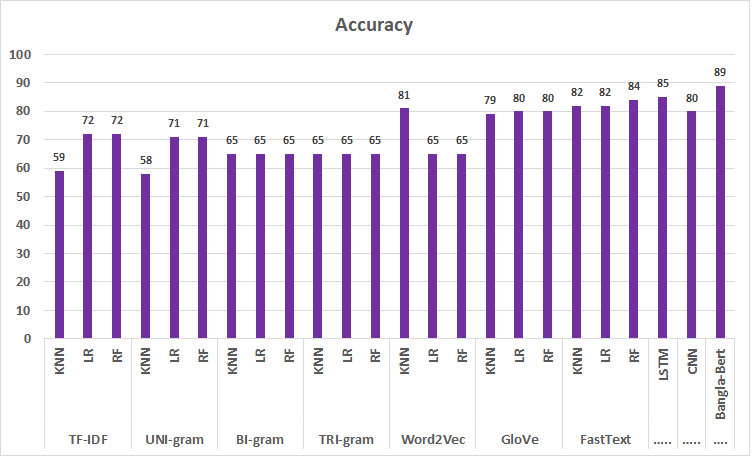

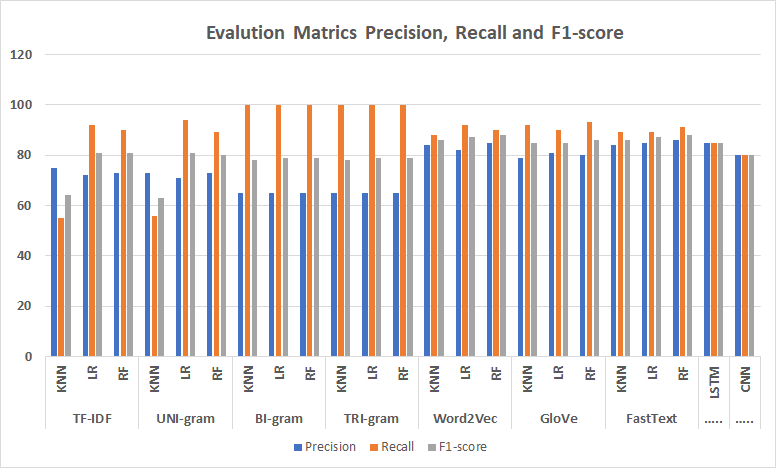